### Pair Programming Visualización I


Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con los csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.

📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

1. ¿Cuántos tickets tenemos de cada tipo?

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
open_xml = pd.read_excel('datos/2016_pandasIII.xlsx')

In [25]:
open_xml.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0
3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0


In [26]:
open_xml['tipo'].unique()

array(['Problema', 'Solicitud', nan], dtype=object)

In [27]:
#usamos reset_index para convertir serie en df
df_conteo = open_xml['tipo'].value_counts().reset_index()
df_conteo

,index,tipo
0,Solicitud,9756
1,Problema,3294


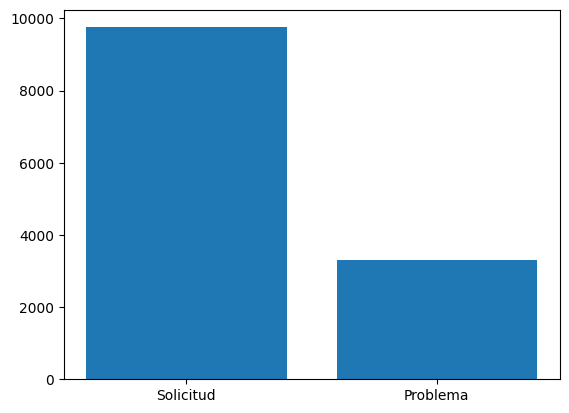

In [28]:
#hacemos barplot

plt.figure()
plt.bar(df_conteo['index'], df_conteo['tipo'])
plt.show()

2. Filtrad los datos para quedarnos solo con los datos de la categoría "Software".

Dentro del conjunto de datos filtrado que acabamos de generar, realiza la mejor visualización para mostrar cuantos tickets tenemos de cada tipo que tenemos (Problema o Solicitud).


In [29]:
# Filtramos para crear un DF cuyo filtro es que solo se tomen los datos de la categoría Software
df_filtro_sf = open_xml[open_xml['categoría'] == 'Software']


In [30]:
# Hemos reducido el dataframe con la información que queremos mostrar: la columna donde se encuentran solicitud y problema

df_filtro_sf_conteo = df_filtro_sf['tipo'].value_counts().reset_index()

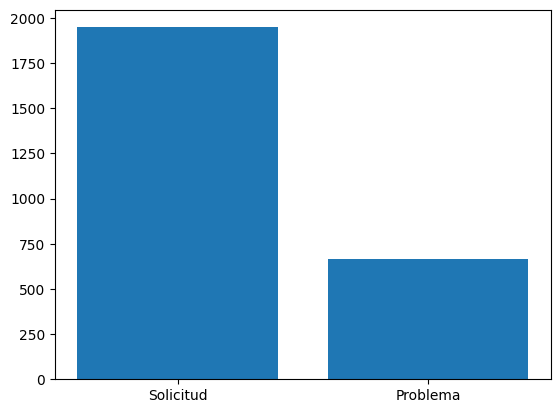

In [31]:
plt.figure()
plt.bar(df_filtro_sf_conteo['index'], df_filtro_sf_conteo['tipo'])
plt.show()

Usando el mismo conjunto de datos filtrado, ¿existe alguna relación entre la satisfacción y los días de resolución?. Poned los nombres de los ejes, siendo el eje x los "días de resolución" y el eje y la "satisfacción".


In [32]:
df_filtro_sf.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0
6,GDLEER-0242564650,2016-07-13,1175.0,36.0,Software,Problema,2 - Normal,0 - Sin Asignar,2.0,1.0
7,GDLEER-0542574815,2016-07-23,561.0,18.0,Software,Problema,2 - Normal,0 - Sin Asignar,5.0,5.0
8,GDLEER-0842457219,2016-03-28,71.0,12.0,Software,Problema,2 - Normal,0 - Sin Asignar,8.0,5.0


In [42]:
df_filtro_sf["días_resolución"].unique()

array([ 0.,  1.,  2.,  5.,  8.,  3.,  4.,  6.,  7.,  9., 10., 11., 15.,
       16., 12., 17., 13., 14., 18., 19.])

In [45]:
#no sabemos si esto ayudaría...

for elem in df_filtro_sf["días_resolución"].unique():
    
    print(df_filtro_sf[df_filtro_sf["días_resolución"] == elem].reset_index())

     index          id_ticket      fecha  id_empleado  id_agente categoría  \
0        4  GDLEER-0042524120 2016-06-03       1842.0       31.0  Software   
1       17  GDLEER-3042595564 2016-08-13       1106.0       15.0  Software   
2       19  GDLEER-3042666351 2016-10-23       1915.0       43.0  Software   
3       20  GDLEER-3042712706 2016-12-08        140.0       27.0  Software   
4       21  GDLEER-3042727271 2016-12-23       1207.0        2.0  Software   
..     ...                ...        ...          ...        ...       ...   
102  12236  TMLEET-3042702657 2016-11-28       1665.0       26.0  Software   
103  12307  TMLTER-0442623056 2016-09-10       1985.0       30.0  Software   
104  12319  TMLTER-2942485403 2016-04-25       1680.0        4.0  Software   
105  12619  TWDEER-1042465707 2016-04-05       1040.0       47.0  Software   
106  12646  TWLEER-9042440790 2016-03-11        919.0       47.0  Software   

          tipo           severidad        prioridad  días_resol

In [46]:

#como vimos anteriormente en el pair de pandas 4, existe una relación inversamente proporcional entre 
#lo que se tarde en responder una solicitud y la satisfacción del solicitante
#esto es, cuanto menos tarde, mayor será la puntuación de satisfacción

df_filtro_sf[df_filtro_sf["días_resolución"] == 0].head()


,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
17,GDLEER-3042595564,2016-08-13,1106.0,15.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
19,GDLEER-3042666351,2016-10-23,1915.0,43.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,4.0
20,GDLEER-3042712706,2016-12-08,140.0,27.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
21,GDLEER-3042727271,2016-12-23,1207.0,2.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0


In [ ]:
df_filtro_sf.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0
6,GDLEER-0242564650,2016-07-13,1175.0,36.0,Software,Problema,2 - Normal,0 - Sin Asignar,2.0,1.0
7,GDLEER-0542574815,2016-07-23,561.0,18.0,Software,Problema,2 - Normal,0 - Sin Asignar,5.0,5.0
8,GDLEER-0842457219,2016-03-28,71.0,12.0,Software,Problema,2 - Normal,0 - Sin Asignar,8.0,5.0


In [ ]:
#df_nuevo = [([df_filtro_sf['satisfacción']]) & ([df_filtro_sf['días_resolución']])]

Usando el mismo conjunto de datos filtrado, ¿cuál es la frecuencia de cada una de las satisfacciones que tenemos en el conjunto de datos?

In [56]:
# frecuencia = el número de veces que se repiten cada uno de los valores únicos de las satisfacciones
df_filtro_satisfaccion_sf = df_filtro_sf['satisfacción'].value_counts().reset_index()
df_filtro_satisfaccion_sf

,index,satisfacción
0,5.0,1267
1,4.0,770
2,1.0,308
3,3.0,213
4,2.0,51


3. En el ejercicio anterior hemos filtrado por "Software", realizar los mismos ejercicios que en el ejercicio 2, solo que en este caso filtrar por "Hardware"

In [49]:
df_filtro_hd = open_xml[open_xml['categoría'] == 'Hardware']
df_filtro_hd.head(2)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción
15,GDLEER-2342731423,2016-12-27,422.0,24.0,Hardware,Problema,2 - Normal,0 - Sin Asignar,10.0,5.0
18,GDLEER-3042628638,2016-09-15,1863.0,46.0,Hardware,Problema,2 - Normal,0 - Sin Asignar,9.0,5.0


In [53]:
df_filtro_hd_conteo = df_filtro_hd['tipo'].value_counts().reset_index()
df_filtro_hd_conteo

,index,tipo
0,Solicitud,956
1,Problema,315


In [ ]:
# Obtenemos la gráfica (solo queda cambiar datos)
plt.figure()
plt.bar(df_filtro_sf_conteo['index'], df_filtro_sf_conteo['tipo'])
plt.show()

Como ya hemos dicho en algunas ocasiones, somo analistas de datos y no debemos conformarnos solo con escribir el código y que nos devuelva una gráfica. 

Una vez que hayáis terminado de hacer las gráficas, interpretad los resultados obtenidos de las gráficas creadas en el ejercicio 3 y 4. El objetivo, hacer una comparación entre la categoría "Software" y "Hardware", por ejemplo, ¿están los clientes que tienen problemas de la categoría "Software" más satisfechos que los clientes de la categoría "Hardware".

In [ ]:
#interpretación de los diferentes valores, crear alguna grafiquita para mostrar las conclusiones y los datos